In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
df = pd.read_csv(r"C:\Users\Rajkumar Sharma\Downloads\emails.csv")

df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [7]:
X = df.iloc[:, 1:-1]
y = df.Prediction

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def make_model(X, y):
    # split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
    
    # build model
    LR = LogisticRegression(random_state=0)
    LR.fit(X_train, y_train)
    
    # evaluate model
    y_pred = LR.predict(X_test)
    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return LR, cr, cm

_, cr, cm = make_model(X, y)

C:\Users\Rajkumar Sharma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       918
           1       0.93      0.95      0.94       375

    accuracy                           0.97      1293
   macro avg       0.96      0.96      0.96      1293
weighted avg       0.97      0.97      0.97      1293



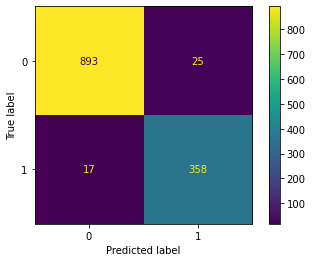

In [10]:
ConfusionMatrixDisplay(cm).plot()

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1000)

X_new = pca.fit_transform(X)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       918
           1       0.93      0.97      0.95       375

    accuracy                           0.97      1293
   macro avg       0.96      0.97      0.96      1293
weighted avg       0.97      0.97      0.97      1293



C:\Users\Rajkumar Sharma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


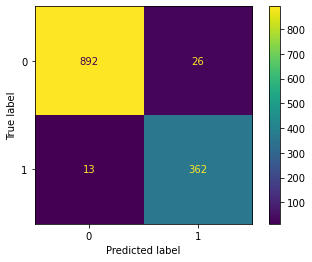

In [12]:
_, cr, cm = make_model(X_new, y)

print(cr)

ConfusionMatrixDisplay(cm).plot()